In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np

import chart_studio
chart_studio.tools.set_credentials_file(username='', api_key='')

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import chart_studio.plotly as py

In [32]:
states_df = pd.read_html("https://www.ssa.gov/international/coc-docs/states.html")[0].rename(columns={0:'state_name',1:'state_abbreviation'})

In [36]:
states_df['random_number'] = np.random.randint(10, 100, states_df.shape[0])

In [38]:
states_df.head()

,state_name,state_abbreviation,random_number
0,ALABAMA,AL,11
1,ALASKA,AK,55
2,AMERICAN SAMOA,AS,98
3,ARIZONA,AZ,25
4,ARKANSAS,AR,28


In [12]:
states_df.to_csv('usa_random_numbers.csv')

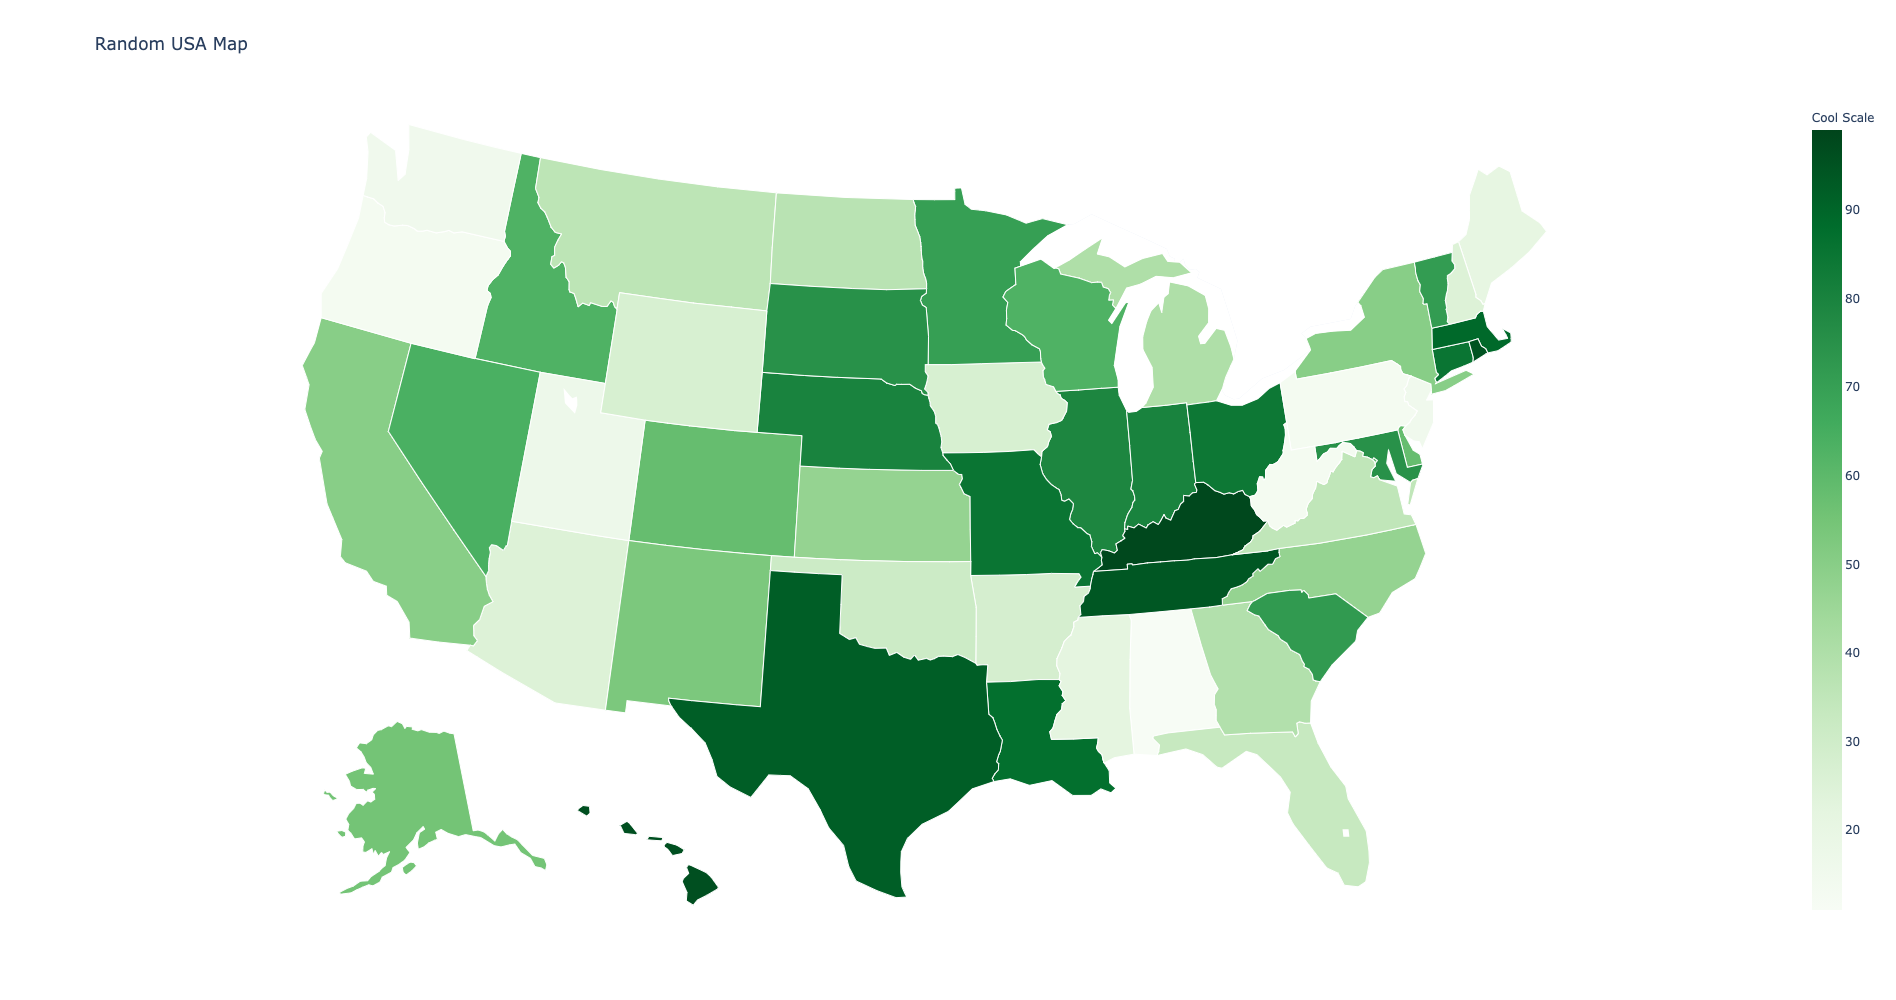

In [42]:
df = states_df

df['text'] = df['state_name'].str.title() + '<br>' + 'Random Number ' + df['random_number'].astype('str') + '<br>'

fig = go.Figure(data=go.Choropleth(
    locations=df['state_abbreviation'].str.strip(),
    z=df['random_number'].astype(float),
    locationmode='USA-states',
    colorscale='Greens',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Cool Scale"
))

fig.update_layout(
    title_text='Random USA Map',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
        width=1500, height=1000
)

pio.write_html(fig, 'usa.html')
py.iplot(fig, filename = 'simple-usa-map')

fig.show()